<font size = '10'> **Python walk-through for Titanic data analysis** </font>

**Note:** This is not a streamlined analysis, but it contains certain redundancies with the purpose of featuring and exploring different visualisation and modelling tools that can be useful in approaching a binary classification problem. I'm happy to see that my notes are useful for others who are starting out in data analysis and machine learning, and I hope that you will be able to get some inspiration from this kernel.

As the kernel continues to grow it is branching out in more detail into the different data analysis steps. This adds more depth to the overall content, but it also makes the whole notebook rather extensive. If you're very new to this subject then I recommend to go through each section on it's own (e.g. by playing with a forked copy) rather than reading the whole thing in one go. Of course, for newbies I also recommend the excellent kernels featured in the Titanic Tutorials.

For those of you who prefer R over Python or want to try out both: I'm currently building a new R kernel for Titanic along the same philosophy as this one here. Feel free to check it out and let me know your feedback :-)

<font size = '4'> **Outline:** </font>

(Note: the hyper links "kind of" work, in that they take you to the corresponding section but create a separate HTML page every time you click one of them. Plus, scrolling only works with arrow keys [at least for me on Firefox]. Feel free to try them out and let me know whether you find them useful.)

 - Load Data and Modules (complete)
 - Initial Exploration (complete)
 - Relations between features (complete)
 - Missing values (complete)
 - Derived (engineered) features (largely complete)
 - Preparing for modelling (complete)
 - Modelling (medium completeness; to be extended)
 - Preparing our prediction for submission (complete)

# . Load Data and Modules

**Load Python modules:** The list of modules grows step by step by adding new functionality that is useful for this project. A module could be defined further down once it is needed, but I prefer to have them all in one place to keep an overview.

In [1]:

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
import xgboost as xgb
import lightgbm as lgb
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')

**Load input data.** And combine the available features of train and test data sets. test of course doesn't have the column that indicates survival.

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combine = pd.concat([train.drop('Survived',1),test])

# .Initial Exploration


**Look at your data in as many different ways as possible**. Some properties and connections will be immediately obvious. Others will require you to examine the data, or parts of it, in more specific ways. Metaphorically speaking: this is the part where the detective finds the clues.



First a broad overview. What are the types of data and their typical shape and content?

In [3]:
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Together with the PassengerId which is just a running index and the indication whether this passenger survived (1) or not (0) we have the following information for each person:

 - Pclass is the Ticket-class: first (1), second (2), and third (3) class tickets were used. This is an ordinal integer feature.

 - Name is the name of the passenger. The names also contain titles and some persons might share the same surname; indicating family relations. We know that some titles can indicate a certain age group. For instance Master is a boy while Mr is a man. This feature is a character string of variable length but similar format.

 - Sex is an indicator whether the passenger was female or male. This is a categorical text string feature.

 - Age is the integer age of the passenger. There are NaN values in this column.

- SibSp is another ordinal integer feature describing the number of siblings or spouses travelling with each passenger.

- Parch is another ordinal integer features that gives the number of parents or children travelling with each passenger.

- Ticket is a character string of variable length that gives the ticket number.

- Fare is a float feature showing how much each passenger paid for their rather memorable journey.

- Cabin gives the cabin number of each passenger. There are NaN in this column. This is another string feature.

- Embarked shows the port of embarkation as a categorical character value.

In summary we have 1 floating point feature (Fare), 1 integer variable (Age), 3 ordinal integer features (Plcass, SibSp, Parch), 2 categorical text features (Sex, Embarked), and 3 text string features (Ticket, Cabin, Name).

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The minimum/maxim values for pclass, age, sibsp, parch show us the range of these features. Also we see that there's quite a range in fares.

**Missing values**

In [5]:
print(train.isnull().sum())
print(test.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


Knowing about missing values is important because they indicate how much we don't know about our data. Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow.

**We learn:**

 - In the **training data** a large majority of Cabin numbers are missing, together with 177 Age values and 2 Embarked values.

 - Also, in the **test** data there is one Fare missing (cheeky selection), almost 100 Age values are unknown, and only 91 Cabin numbers were preserved. Best to keep that in mind.

In [6]:
surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]
surv_col = "blue"
nosurv_col = "red"

print("Survived: %i (%.1f percent), Not Survived: %i (%.1f percent), Total: %i"\
      %(len(surv), 1.*len(surv)/len(train)*100.0,\
        len(nosurv), 1.*len(nosurv)/len(train)*100.0, len(train)))

Survived: 342 (38.4 percent), Not Survived: 549 (61.6 percent), Total: 891


In our training data set about 60% of the passengers didn't survive. By flat out predicting that everyone in the testing data set died we would get a 60% accuracy. Let's try to do better than that.

Here we also define a consistent colour scheme for the distinguishing between survived / not survived. This scheme will (soon) be used throughout this kernel.

OK, let's go through the features one by one to see what we find. Here we will see how the distributions of survivors and non-survivors compare. Personally, I like histograms for a first look at comparing two or more populations in case of scaled features. For categorical features we will use barplots plus standard deviation bars, to better judge the significance.

Median age survivors: 28.0, Median age non-survivers: 28.0


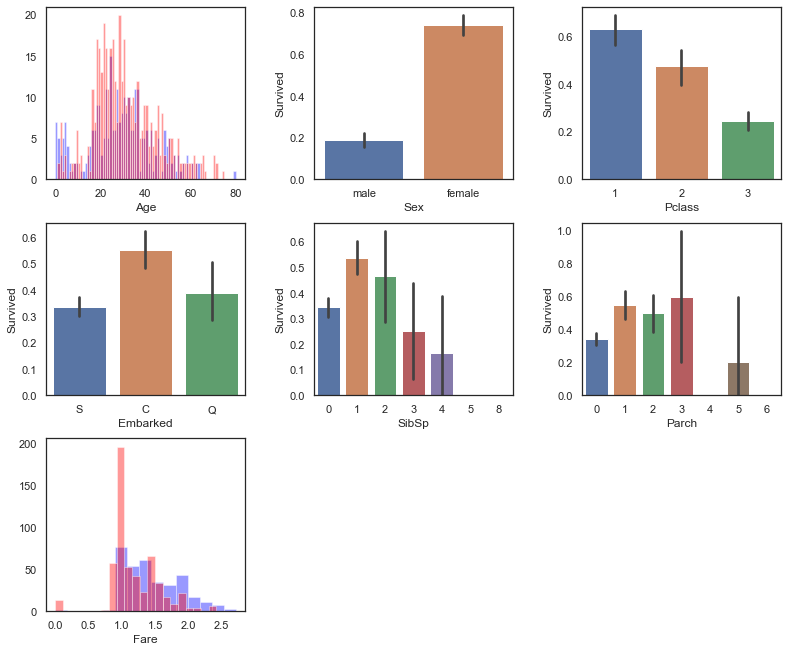

In [7]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[12,10])
plt.subplot(331)
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(nosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Age')
plt.subplot(332)
sns.barplot('Sex', 'Survived', data=train)
plt.subplot(333)
sns.barplot('Pclass', 'Survived', data=train)
plt.subplot(334)
sns.barplot('Embarked', 'Survived', data=train)
plt.subplot(335)
sns.barplot('SibSp', 'Survived', data=train)
plt.subplot(336)
sns.barplot('Parch', 'Survived', data=train)
plt.subplot(337)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color=surv_col)
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

print("Median age survivors: %.1f, Median age non-survivers: %.1f"\
      %(np.median(surv['Age'].dropna()), np.median(nosurv['Age'].dropna())))

Above we are creating a kind of summary dashboard, where we collect relevant visualisations to study the distributions of the individual features. We use the matplotlib subplot tool to line up the individual plots in a grid. We use overlapping histograms for ordinal features and barplots for categorical features. The barplots show the fraction of people (per group) who survived. There's a lot going on in this figure, so take your time to look at all the details.

We learn the following things from studying the individual features:

 - Age: The medians are identical. However, it's noticeable that fewer young adults have survived (ages 18 - 30-ish) whereas children younger than 10-ish had a better survival rate. Also, there are no obvious outliers that would indicate problematic input data. The highest ages are well consistent with the overall distribution. There is a notable shortage of teenagers compared to the crowd of younger kids. But this could have natural reasons.

 - Pclass: There's a clear trend that being a 1st class passenger gives you better chances of survival. Life just isn't fair.

 - SibSp & Parch: Having 1-3 siblings/spouses/parents/children on board (SibSp = 1-2, Parch = 1-3) suggests proportionally better survival numbers than being alone (SibSp + Parch = 0) or having a large family travelling with you.

 - Embarked: Well, that does look more interesting than expected. Embarking at "C" resulted in a higher survival rate than embarking at "S". There might be a correlation with other variables, here though.

 - Fare: This is case where a linear scaling isn't of much help because there is a smaller number of more extreme numbers. A natural choice in this case is to transform the values logarithmically. For this to work we need to adjust for the zero-fare entries. The plot tells us that the survival chances were much lower for the cheaper cabins. Naively, one would assume that those cheap cabins were mostly located deeper inside the ship, i.e. further away from the life boats.

A little follow up: For SibSp we see in the plot that most of the differences are not very significant (overlapping error bars). Another way of checking the actual numbers are through cross tables:

In [8]:
tab = pd.crosstab(train['SibSp'], train['Survived'])
print(tab)
#dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", 
#                         stacked=True, color=[nosurv_col,surv_col])
#dummy = plt.xlabel('SibSp')
#dummy = plt.ylabel('Percentage')

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


Passengers with more than 3 children+parents on board had low survival chances. However the corresponding number are not very large. For SibSp we have 15 vs 3, 5 vs 0, and 7 vs 0.

Random outcomes with 2 possibilities (like heads or tails when flipping a coin) follow the binomial distribution. We can use a binomial test to estimate the probability that 5 non-survivors out of a total 5 passengers with SibSp = 5 happened due to chance assuming the overall 38% survival chance for the entire sample.

In [9]:
stats.binom_test(x=5,n=5,p=0.62)

0.16417601599999998

Anything above 0.05 is usually not significant and therefore solely based on these numbers we cannot say whether the SibSp = 5 sample behaves different than the rest.

For larger numbers of Parch we have 4 vs 0, 4 vs 1, and 1 vs 0. Just by themselves, the last two are definitely not impressive. Combining them into parch >= 4 gives us 9 vs 1 which is much better.

We learn: parch >= 4 and sibsp >= 3 is bad. So is parch + sibsp = 0 (i.e. both 0). Parch in 1-3 and Sibsp in 1-2 is good.

**Cabin numbers**

This is a tricky feature because there are so many missing values and the strings don't all have the same number or formatting.

In [10]:
print("We know %i of %i Cabin numbers in the training data set and"
      %(len(train['Cabin'].dropna()), len(train)))
print("we know %i of %i Cabin numbers in the testing data set."
      %(len(test['Cabin'].dropna()), len(test)))
train.loc[:,['Survived','Cabin']].dropna().head(8)

We know 204 of 891 Cabin numbers in the training data set and
we know 91 of 418 Cabin numbers in the testing data set.


,Survived,Cabin
1,1,C85
3,1,C123
6,0,E46
10,1,G6
11,1,C103
21,1,D56
23,1,A6
27,0,C23 C25 C27


**We can try out:**

    - I suppose one could take the starting letters, which might indicate specific decks on the ship, and use them as an additional classifier. But for less than 25% of cabins known this might not be very useful. We'll see.

    - Also, given that so few cabin numbers are know it doesn't seem that there are good records of them. Therefore, one should assume that it's more likely to know someone's cabin number if they survived. Let's see about that in the derived features.

TODO: Why do some people have multiple cabin numbers? What does that mean?

**Ticket numbers**

    - That seems to be a hopeless variable at first because it just looks like random strings. But in these days, when you were travelling as a group/family did everyone really get their own ticket? Let's find out how many unique ticket numbers there are:

In [11]:
print("There are %i unique ticket numbers among the %i tickets." \
      %(train['Ticket'].nunique(),train['Ticket'].count()))

There are 681 unique ticket numbers among the 891 tickets.


Interesting. Sharing a ticket number is not uncommon. Let's follow that up a bit.

In [12]:
grouped = train.groupby('Ticket')
k = 0
for name, group in grouped:
    if (len(grouped.get_group(name)) > 1):
        print(group.loc[:,['Survived','Name', 'Fare']])
        k += 1
    if (k>10):
        break

     Survived                                               Name  Fare
257         1                               Cherry, Miss. Gladys  86.5
504         1                              Maioni, Miss. Roberta  86.5
759         1  Rothes, the Countess. of (Lucy Noel Martha Dye...  86.5
     Survived                                    Name   Fare
262         0                       Taussig, Mr. Emil  79.65
558         1  Taussig, Mrs. Emil (Tillie Mandelbaum)  79.65
585         1                     Taussig, Miss. Ruth  79.65
     Survived                            Name  Fare
110         0  Porter, Mr. Walter Chamberlain  52.0
475         0     Clifford, Mr. George Quincy  52.0
     Survived                                             Name     Fare
329         1                     Hippach, Miss. Jean Gertrude  57.9792
523         1  Hippach, Mrs. Louis Albert (Ida Sophia Fischer)  57.9792
     Survived                                    Name  Fare
166         1  Chibnall, Mrs. (Edith Mar

**We can try out:**

Working hypothesis: if your group (mostly family) survived then you survived as well, unless you were a man (and presumably helped your wife/daughter/lady friend). We could go through the trouble here to identify families by last name. However

    - Common last names might not be unique in the passenger list
    - As we see above a ticket is not always shared by people with a common name.
    
Therefore, a shared ticket might actually be a stronger predictor. Of course this assumption should be tested by doing the last-name thing too. In addition, we see that the Fare was identical for all the passengers in each ticket group. This is something we will explore in more detail below.

# .Relations between features

After inspecting the available features individually you might have realised that some of them are likely to be connected. Does the age-dependent survival change with sex? How are pclass and fare related? Are they strongly enough connected so that one of them is superfluous? Let's find out.

Now we are connecting individual clues to get a glimpse of the bigger picture.

We start with an overview plot of the feature relations: Here we show a correlation matrix for each numerical variable with all the other numerical variables. We excluded PassengerID, which is merely a row index. In the plot, stronger correlations have brighter colours in either red (positive correlation) or blue (negative correlation). The closer to white a colour is the weaker the correlation.

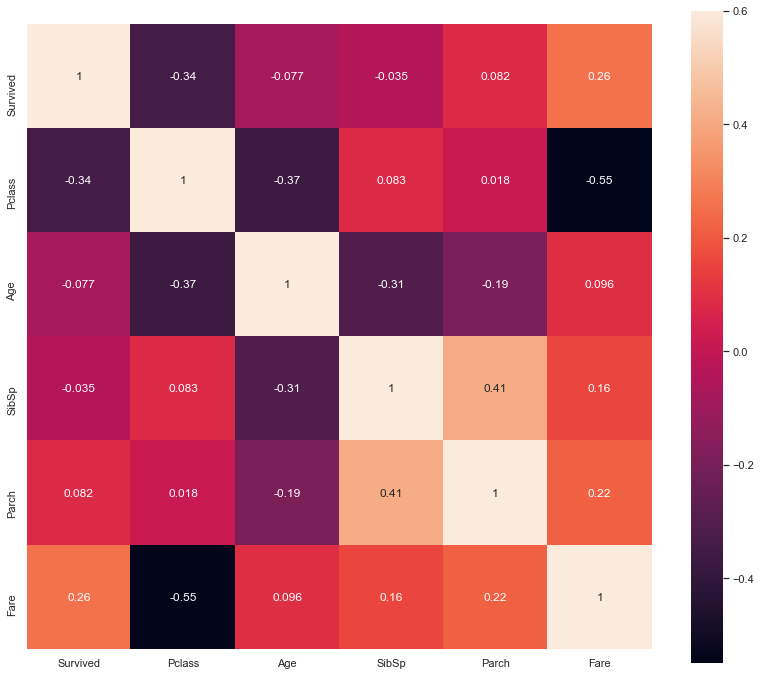

In [13]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

Positive vs negative correlation needs to be understood in terms of whether an increase in one feature leads to an increase (positive) or decrease (negative) in the correlated feature. Perfect correlation would have a correlation index of 1; perfect anti-correlation (= negative correlation) would have -1 (obviously each feature is perfectly correlated with itself; leading to the deep red diagonal). The upper right vs lower left triangle that make up this plot contain the same information, since the corresponding cells show the correlation coefficients of the same features.

The matrix gives us an overview as to which features are particularly interesting for our analysis. Both strongly positive or negative correlations with the Survived feature are valuable. Strong correlations between two other features would suggest that only one of them is necessary for our model (and including the other would in fact induce noise and potentially lead to over-fitting).

We learn:

Pclass is somewhat correlated with Fare (1st class tickets would be more expensive than 3rd class ones)
SibSp and Parch are weakly correlated (large families would have high values for both; solo travellers would have zero for both)
Pclass already correlates with Survived in a noticeable way
In addition, we plot a Pairplot of the numerical features. This kind of plot is a more detailed visualisation of relationships between variables. It shows scatter plots for the different feature combinations plus a distribution of each feature on the diagonal. Again, the upper right and lower left triangle contain the same information. This kind of plot is vastly more useful for a set of continuous variables, instead of the categorical or integer values we have here. Nonetheless, it is a valuable exploratory tool that has a place in everyone's toolbox.

This plot is inspired by, and realised much more aesthetically in, the comprehensive Ensemble Stacking Kernel by Anisotropic



In [14]:
#cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
#g = sns.pairplot(data=train.dropna(), vars=cols, size=1.5,
                 #hue='Survived', palette=[nosurv_col,surv_col])
#g.set(xticklabels=[])

Now we continue to examine these initial indications in more detail. Earlier, we had a look at the Survived statistics of the individual features in the overview figure. Here, we want to look at correlations between the predictor features and how they could affect the target Survived behaviour.

Usually it's most interesting to start with the strong signals in the correlation plot and to examine them more in detail.

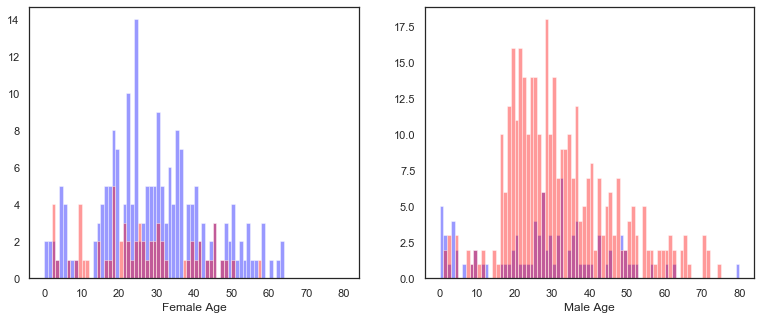

In [15]:
msurv = train[(train['Survived']==1) & (train['Sex']=="male")]
fsurv = train[(train['Survived']==1) & (train['Sex']=="female")]
mnosurv = train[(train['Survived']==0) & (train['Sex']=="male")]
fnosurv = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[13,5])
plt.subplot(121)
sns.distplot(fsurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(fnosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Female Age')
plt.subplot(122)
sns.distplot(msurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(mnosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Male Age')

We learn:

For females the survival chances appear to be higher between 18 and 40, whereas for men in that age range the odds are flipped. This difference between 18-40 yr olds might be a better feature than Sex and Age by themselves.

Boys have proportional better survival chances than men, whereas girls have similar chances as women have. Rather small numbers, though.

We study the correlation of Age with Pclass using a violin plot, which is also split between survived (right half) and not survived (left half). Check out the other visualisations in your forked copy.

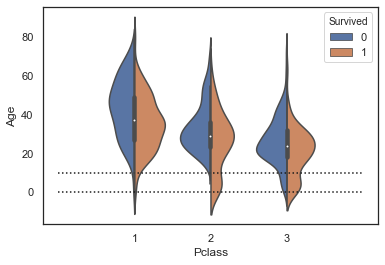

In [16]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True)
plt.hlines([0,10], xmin=-1, xmax=3, linestyles="dotted")

Violin plots are a modified version of boxplots, where the shape is a "kernel density estimate" of the underlying distribution. These estimates are smoothed and therefore extend beyond the actual values (look closely at the dotted zero level). I have also indicated Age == 10, which we will use to define children (vs teenagers) in the engineering part below.

We learn:

Age decreases progressively as Pclass decreases from 1st to 3rd
Most older passengers are 1st class, but very few children are. This conflates the impact of Age and Pclass on the survival chances.
In 1st class, younger adults had better survival chances than older ones.
Most children in 2nd class survived, and the majority in 3rd class did too.
For a view into Pclass vs Sex let's use a mosaic plot for a 2-dimensional overview.

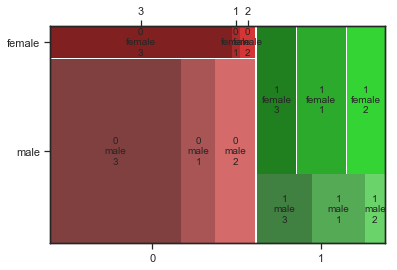

In [17]:
dummy = mosaic(train,["Survived","Sex","Pclass"])

Also, we will start to use factorplots, i.e. groups of pointplots, from the seaborn plotting package to visualise the categorical relations:

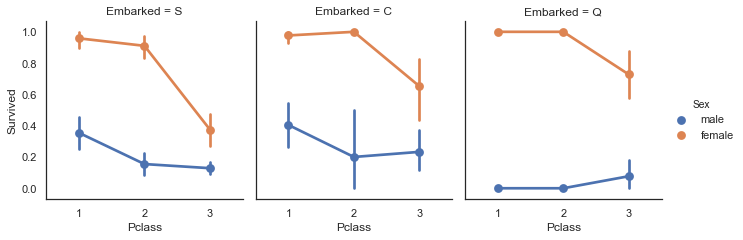

In [18]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", col="Embarked",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

# for some reason in this plot the colours for m/f are flipped:
#grid = sns.FacetGrid(train, col='Embarked', size=2.2, aspect=1.6)
#grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep')
#grid.add_legend()

We learn:

 - Both the factorplot and the mosaicplot indicate that almost all females that died were 3rd class passengers.
 - For males being in 1st class gives a survival boost, otherwise the proportions look roughly similar.
 - Except for 3rd class, the survival for Embarked == Q is close to 100% split between male and female.
 
Let's follow up the numbers for Pclass vs Embarked with a pandas crosstab plot:

Pclass      1    2    3
Embarked               
C         141   28  101
Q           3    7  113
S         177  242  495


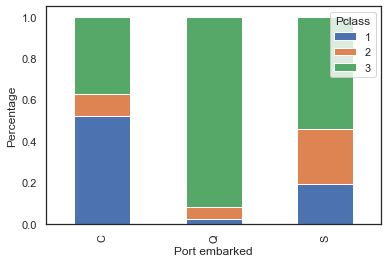

In [19]:
tab = pd.crosstab(combine['Embarked'], combine['Pclass'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

We learn:

 - a high percentage of those embarked at "C" were 1st class passengers.
 - almost everyone who embarked at "Q" went to 3rd class (this means that the clear separation in the factorplot for "Q" isn't very meaningful, unfortunately).
 
The 2nd point is somewhat curious, since we recall from above that the survival chances for "Q" were actually slightly better than for "S". Not significantly so, of course, but certainly not worse even though "S" had a higher percentage of 1st and 2nd class passengers.

It seems that embarking at "Q" improved your chances for survival if you were a 3rd class passenger. Let's investigate that a bit more:

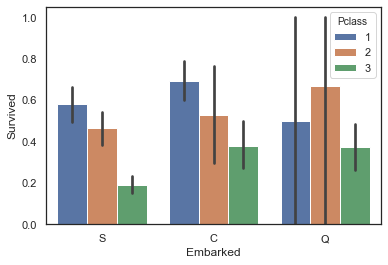

In [20]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=train)

Ok, now from here it looks more like "S" is the interesting port since survival is less probably for that one if you are a 3rd class passenger. Otherwise there is no significant difference within each class.

There seems to be some impact here that isn't captured by the passenger class. What about the other strong feature, Sex?

Sex       female  male
Embarked              
C            113   157
Q             60    63
S            291   623


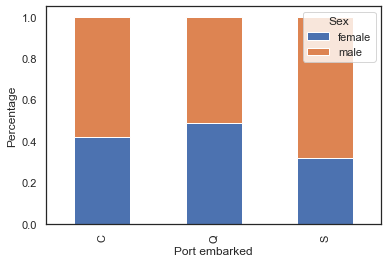

In [21]:
tab = pd.crosstab(combine['Embarked'], combine['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

Now this is somewhat expected since it explains the difference between "S" and the other ports. Therefore, it seems that between more 1st class passengers embarking at "C" and more men at "S" there doesn't seem to be much actual influence in the port of embarkation.

However, the last plot should also indicate that ...

Sex     female  male
Pclass              
1          144   179
2          106   171
3          216   493


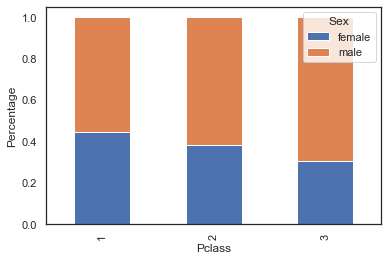

In [22]:
tab = pd.crosstab(combine['Pclass'], combine['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Percentage')

Sex    female  male
SibSp              
0         174   434
1         106   103
2          13    15
3          11     5
4           6    12
5           1     4
8           3     4
Sex    female  male
Parch              
0         194   484
1          60    58
2          49    31
3           4     1
4           2     2
5           4     1
6           1     0


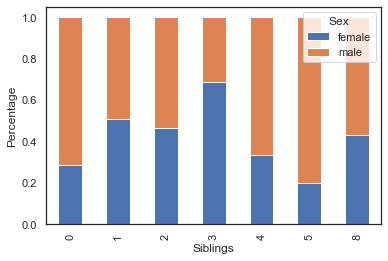

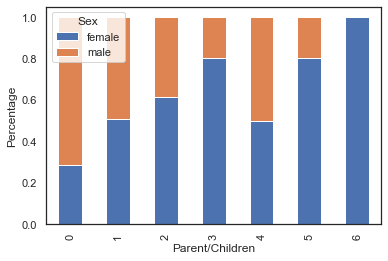

In [23]:
sib = pd.crosstab(train['SibSp'], train['Sex'])
print(sib)
dummy = sib.div(sib.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Siblings')
dummy = plt.ylabel('Percentage')

parch = pd.crosstab(train['Parch'], train['Sex'])
print(parch)
dummy = parch.div(parch.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Parent/Children')
dummy = plt.ylabel('Percentage')

Sort of, yes. This goes some way to explain features like better survival for SibSp = 1-3. But I think that it doesn't cover all the signal in the Parch feature.

We learn:

Different percentages of passenger classes and sexes have embarked from different ports, which is reflected in the lower survival rates for "S" (more men, fewer 1st class) compared to "C" (more women and 1st class).

It's hard to say at this stage whether there is any real impact left for the Embarked feature once we correct for these connections. We will come back to this in the modelling stage when we will study feature importances and significances (soon).

Finally, let's check what's going on between Age and Embarked:

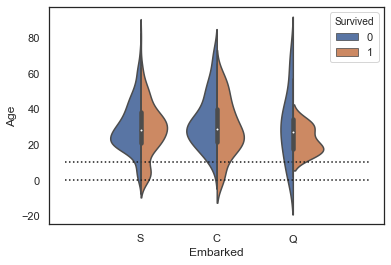

In [24]:
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True)
plt.hlines([0,10], xmin=-1, xmax=3, linestyles="dotted")

The curious distribution for the "Q" survivors somewhat follows the overall trend for 3rd class passengers (which make up the vast majority of "Q") but is notably narrower. Not many of the children there survived, but then there were not many children to begin with. Let's come back to this point in discussing the derived features.

We learn: There don't seem to be strong differences in Age among the Embarked categories that would point at an imbalance that goes beyond the influence of Pclass and Sex.

Let's study the relation between Fare and Pclass in more detail:

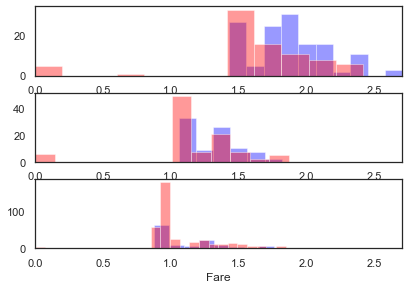

In [25]:
plt.subplot(311)
ax1 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==1].dropna().values+1), kde=False, color=surv_col)
ax1 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==1].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
ax1.set_xlim(0,np.max(np.log10(train['Fare'].dropna().values)))
plt.subplot(312)
ax2 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==2].dropna().values+1), kde=False, color=surv_col)
ax2 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==2].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
ax2.set_xlim(0,np.max(np.log10(train['Fare'].dropna().values)))
plt.subplot(313)
ax3 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==3].dropna().values+1), kde=False, color=surv_col)
ax3 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==3].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
ax3.set_xlim(0,np.max(np.log10(train['Fare'].dropna().values)))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

We learn:

There is a broad distribution between the 1st class passenger fares (rich -> super rich)
There's an interesting bimodality in the 2nd class cabins and a long tail in the 3rd class ones. (TODO: check cumulative fare question)
For each class there is strong evidence that the cheaper cabins were worse for survival. A similar effect can be seen in a boxplot:

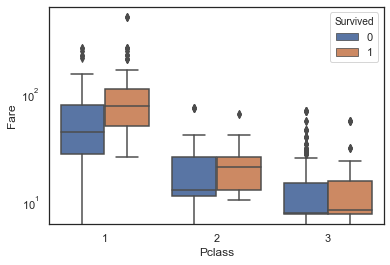

In [26]:
ax = sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=train);
ax.set_yscale('log')

# .Filling in missing values

After studying the relations between the different features let's fill in a few missing values based on what we learned.

In my opinion, the only training feature for which it makes sense to fill in the NAs is Embarked. Too many Cabin numbers are missing. And for Age we will choose a different approach below. We fill in the 1 missing Fare value in the test data frame accordingly.

Let's find the two passengers and assign the most likely port based on what we found so far:

In [27]:
print(train[train['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


These are two women that travelled together in 1st class, were 38 and 62 years old, and had no family on board.

In [29]:
combine.where((combine['Embarked'] !='Q') & (combine['Pclass'] < 1.5) & \
    (combine['Sex'] == "female")).groupby(['Embarked','Pclass','Sex','Parch','SibSp']).size()

Embarked  Pclass  Sex     Parch  SibSp
C         1.0     female  0.0    0.0      30
                                 1.0      20
                          1.0    0.0      10
                                 1.0       6
                          2.0    0.0       2
                                 2.0       2
                          3.0    1.0       1
S         1.0     female  0.0    0.0      20
                                 1.0      20
                                 2.0       3
                          1.0    0.0       7
                                 1.0       6
                          2.0    0.0       4
                                 1.0       5
                                 3.0       3
                          4.0    1.0       1
dtype: int64

Admittedly, these are quite a few grouping levels, but 30 ("C") vs 20 ("S") are numbers that are still large enough to be useful in this context. In addition, already a grouping without the Parch and SibSp features suggests similar numbers for women in 1st class embarking from "C" (71) vs "S" (69) (in contrast to the larger overall number of all 1st class passengers leaving from "S").

Another recent kernel (definitely worth checking out) makes a convincing case for predicting Embarked == "S" for these two passengers (see also the comments). However, in my opinion we have better reasons to impute "C" instead. I recommend that you weigh the arguments and make your own decision.

(How much does it actually matter? Well, in the big picture these are only 2 passengers and their impact on our model accuracy won't be large. However, since the main point of this challenge is to practice data analysis it is certainly worth to take your time to examine the question in a bit more detail.)

In [30]:
train['Embarked'].iloc[61] = "C"
train['Embarked'].iloc[829] = "C"

In [31]:
print(test[test['Fare'].isnull()])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


In [32]:
print(test[test['Fare'].isnull()])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


A 60-yr old 3rd class passenger without family on board. We will base our Fare prediction on the median of the 3rd-class fares:

In [33]:
test['Fare'].iloc[152] = combine['Fare'][combine['Pclass'] == 3].dropna().median()
print(test['Fare'].iloc[152])

8.05


# . Drived (engineered) features

The next idea is to define new features based on the existing ones that allow for a split into survived/not-survived with higher confidence than the existing features. An example would be "rich woman" vs "poor man", but this particular distinction should be handled well by most classifiers. We're looking for something a bit more subtle here. This is the part where the detective puts individual clues together to see whether their sum is more than its parts.

This part of the analysis is called Feature Engineering. I prefer the approach to list all the new features that we define together in one place, to keep an overview. Every time we can think of a new feature, we come back here to define it and then study it further down. We compute the new features in the combined data set, to make sure that all feature realisations are complete, and then split the combine data again into train and test.

The clever way of computing the Shared_ticket values (using group_by and np.where) was contributed by GeorgeChou in the comments. Many thanks!

In [34]:
combine = pd.concat([train.drop('Survived',1),test])
survived = train['Survived']

combine['Child'] = combine['Age']<=10
combine['Cabin_known'] = combine['Cabin'].isnull() == False
combine['Age_known'] = combine['Age'].isnull() == False
combine['Family'] = combine['SibSp'] + combine['Parch']
combine['Alone']  = (combine['SibSp'] + combine['Parch']) == 0
combine['Large_Family'] = (combine['SibSp']>2) | (combine['Parch']>3)
combine['Deck'] = combine['Cabin'].str[0]
combine['Deck'] = combine['Deck'].fillna(value='U')
combine['Ttype'] = combine['Ticket'].str[0]
combine['Title'] = combine['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
combine['Fare_cat'] = pd.DataFrame(np.floor(np.log10(combine['Fare'] + 1))).astype('int')
combine['Bad_ticket'] = combine['Ttype'].isin(['3','4','5','6','7','8','A','L','W'])
combine['Young'] = (combine['Age']<=30) | (combine['Title'].isin(['Master','Miss','Mlle']))
combine['Shared_ticket'] = np.where(combine.groupby('Ticket')['Name'].transform('count') > 1, 1, 0)
combine['Ticket_group'] = combine.groupby('Ticket')['Name'].transform('count')
combine['Fare_eff'] = combine['Fare']/combine['Ticket_group']
combine['Fare_eff_cat'] = np.where(combine['Fare_eff']>16.0, 2, 1)
combine['Fare_eff_cat'] = np.where(combine['Fare_eff']<8.5,0,combine['Fare_eff_cat'])
test = combine.iloc[len(train):]
train = combine.iloc[:len(train)]
train['Survived'] = survived

surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]

Now let's study the new features and see how they relate to the survival chances:

**Child**

Pclass    1    2    3
Child                
False   213  167  447
True      3   17   44
Sex    female  male
Child              
False     283   544
True       31    33


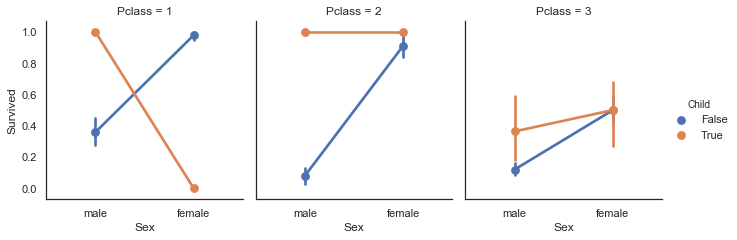

In [36]:
g = sns.factorplot(x="Sex", y="Survived", hue="Child", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)
tab = pd.crosstab(train['Child'], train['Pclass'])
print(tab)
tab = pd.crosstab(train['Child'], train['Sex'])
print(tab)

The Pclass == 1 plot looks interesting at first, but there are only 3 children in this group which makes the apparent pattern just random noise. The other two passenger classes are more interesting, especially for the male children. Note, that since we are selecting by Age, which has many missing values, a number of children will be in the Child == False group. Nonetheless, this seems useful.

We learn: Male children appear to have a survival advantage in 2nd and 3rd class. We should include the Child feature in our model testing.



**Cabin_known**

Survived       0    1
Cabin_known          
False        481  206
True          68  136


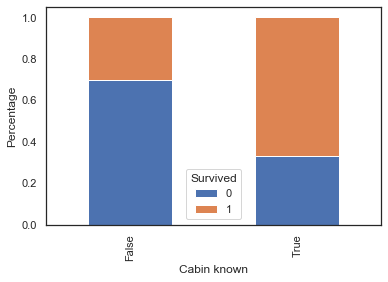

In [37]:
cab = pd.crosstab(train['Cabin_known'], train['Survived'])
print(cab)
dummy = cab.div(cab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Cabin known')
dummy = plt.ylabel('Percentage')

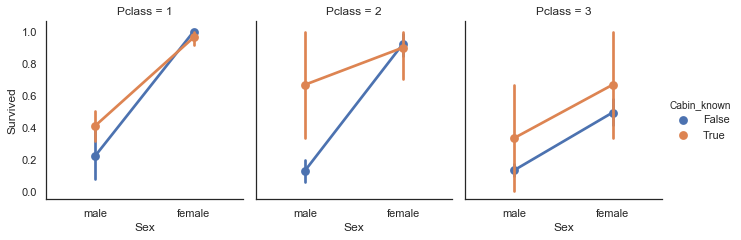

In [38]:
g = sns.factorplot(x="Sex", y="Survived", hue="Cabin_known", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

However, we see again that a large part of this effect disappears once we control for Sex and Pclass.

We learn: There remains a potential trend for males and for 3rd class passengers but the uncertainties are large. This feature should be tested in the modelling stage.